# How to make API calls with Python a guided example

##Abstract

This notebook illustrates the process of making API calls with Python to retrieve data from standard REST APIs. The process usually follows the below framework:

- Finding the URL endpoint of the API and storing it in a variable
- Understanding what parameters are available (via the API homepage) and passing them to the URL
- Use of the requests library to pass the constructed query to the service
- Retrival of data in JSON format
- Serialisation into a Python dictionary
- Processing of the returned object for application needs.

##1. Dependencies & modules imports

The code relies on the following libraries:
- requests (not installed by default -> to be installed by pip3)
- datetime (not installed by default -> to be installed by pip3)
- polars (not installed by default -> to be installed by pip3)
- seaborn (not installed by default -> to be installed by pip)
- json (part of stdlib)
- pprint (part of stdlib)


In [ ]:
# Cell magic - Making sure the required libraries are installed
! pip3 install requests datetime seaborn polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 8.6 MB/s eta 0:00:00


In [ ]:
# Imports
import requests # importing the requests library to make automated http calls
import json # importing json library to parse JSON object response -> part of standard lib
from datetime import datetime, timedelta # Importing library to get dates and calculate time deltas
import pprint # Importing library to pretty print Python dictionaries -> part of standard lib
import polars as pl # Tabular data frames
import seaborn as sns # Easy Charting

#2. Example: Making API Call to WeatherAPI.com

In [ ]:
# Setting up variables
## A. access tokens - This is the API key given by weatherapi.com
api_key = '24c110e315e64065bef103408232404'

## B. api endpoint
url = 'https://api.weatherapi.com/v1/forecast.json'

## C. Dates dictionary
### Creating a dictionary of dates for the next 5 days
today = datetime.today().date()

next_7_days = {
    'now': today.strftime('%Y-%m-%d'),
    'tomorrow': (today + timedelta(days=1)).strftime('%Y-%m-%d'),
    'in 2 days': (today + timedelta(days=2)).strftime('%Y-%m-%d'),
    'in 3 days': (today+ timedelta(days=3)).strftime('%Y-%m-%d'),
    'in 4 days': (today+ timedelta(days=4)).strftime('%Y-%m-%d'),
    'in 5 days': (today+ timedelta(days=5)).strftime('%Y-%m-%d')
}

## D. Cities List
cities = ['Paris', 'London', 'New York']

## E. Specifying Parameters to API
params = {'key': api_key, 'dt' : next_7_days['now'],'q': cities[0]}

In [ ]:
# Making a call directly to the WeatherAPI.com Api
with requests.get(url, params=params) as response:
  data =  response.json()  # Parse the JSON response into a Python dictionary
  pprint.pprint(data) # Pretty prints the python dictionary (otherwise would be displayed a one line)

{'current': {'cloud': 0,
             'condition': {'code': 1000,
                           'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png',
                           'text': 'Sunny'},
             'feelslike_c': 20.0,
             'feelslike_f': 68.0,
             'gust_kph': 21.2,
             'gust_mph': 13.2,
             'humidity': 46,
             'is_day': 1,
             'last_updated': '2023-06-02 18:15',
             'last_updated_epoch': 1685722500,
             'precip_in': 0.0,
             'precip_mm': 0.0,
             'pressure_in': 30.06,
             'pressure_mb': 1018.0,
             'temp_c': 20.0,
             'temp_f': 68.0,
             'uv': 6.0,
             'vis_km': 10.0,
             'vis_miles': 6.0,
             'wind_degree': 10,
             'wind_dir': 'N',
             'wind_kph': 20.2,
             'wind_mph': 12.5},
 'forecast': {'forecastday': [{'astro': {'is_moon_up': 1,
                                         'is_sun_up': 0,
        

#3. Example: Making API Call to Alphavantage.co

To make an API call and request End of day prices (EOD) we can use what is called an "API End Point"

- In this case https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED
- We can then pass optional parameters to the URL via "parameters"
- we need to specify the type of data, API key etc...



Example of sample constructed URL to get price data for IBM

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=IBM&outputsize=full&apikey=demo

In [ ]:
import requests
import pprint

# In the below - replace the ticker with the stock ticker you want
##             - replace demo by your own API key (you can get one for free on Alphavantage)

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED'
params = {
    'symbol' : 'IBM',
    'outputsize' : 'full',
    'apikey' : 'demo'
}
# Making a call directly to the WeatherAPI.com Api
with requests.get(url, params=params) as response:
  data =  response.json()  # Parse the JSON response into a Python dictionary
  pprint.pprint(data) # Pretty prints the python dictionary (otherwise would be displayed a one line)

Streaming output truncated to the last 5000 lines.
                         '2020-12-16': {'1. open': '125.93',
                                        '2. high': '126.5728',
                                        '3. low': '125.286',
                                        '4. close': '125.55',
                                        '5. adjusted close': '105.991495260587',
                                        '6. volume': '4530096',
                                        '7. dividend amount': '0.0000',
                                        '8. split coefficient': '1.0'},
                         '2020-12-17': {'1. open': '126.08',
                                        '2. high': '126.09',
                                        '3. low': '124.91',
                                        '4. close': '125.55',
                                        '5. adjusted close': '105.991495260587',
                                        '6. volume': '3787962',
                        

In [ ]:
# Returned JSON object has two keys
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [ ]:
# To access time series data we drill down to the second key
## For IBM we seem to have quite a large range of dates
print(min(data['Time Series (Daily)'].keys()))
print(max((data['Time Series (Daily)'].keys())))

1999-11-01
2023-06-12


##4. Transitioning from Dict to tabular data

In [ ]:
# Polars has superseeded Pandas for tabular data manipulation
# Pandas is optimized for single core used whereas polars is written Rust and optimized for multicores procs.

In [ ]:
# Upacking the dictonary returned by alpha vantage creating a list of dicts we can pass to polars:
rows = [{**{'date': date}, **values} for date, values in data['Time Series (Daily)'].items()]
rows

[{'date': '2023-06-12',
  '1. open': '136.0',
  '2. high': '136.62',
  '3. low': '135.8216',
  '4. close': '136.42',
  '5. adjusted close': '136.42',
  '6. volume': '4500120',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 {'date': '2023-06-09',
  '1. open': '134.36',
  '2. high': '136.1',
  '3. low': '134.17',
  '4. close': '135.3',
  '5. adjusted close': '135.3',
  '6. volume': '3981748',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 {'date': '2023-06-08',
  '1. open': '134.69',
  '2. high': '135.98',
  '3. low': '134.01',
  '4. close': '134.41',
  '5. adjusted close': '134.41',
  '6. volume': '4128939',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 {'date': '2023-06-07',
  '1. open': '132.5',
  '2. high': '134.44',
  '3. low': '132.19',
  '4. close': '134.38',
  '5. adjusted close': '134.38',
  '6. volume': '5772024',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 {'date': '2023-06-06',
  '1. o

In [ ]:
# By default dictionaries in Polars are ingested as strings
df = pl.DataFrame(rows)
df

date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
str,str,str,str,str,str,str,str,str
"""2023-06-12""","""136.0""","""136.62""","""135.8216""","""136.42""","""136.42""","""4500120""","""0.0000""","""1.0"""
"""2023-06-09""","""134.36""","""136.1""","""134.17""","""135.3""","""135.3""","""3981748""","""0.0000""","""1.0"""
"""2023-06-08""","""134.69""","""135.98""","""134.01""","""134.41""","""134.41""","""4128939""","""0.0000""","""1.0"""
"""2023-06-07""","""132.5""","""134.44""","""132.19""","""134.38""","""134.38""","""5772024""","""0.0000""","""1.0"""
"""2023-06-06""","""132.43""","""132.94""","""131.88""","""132.69""","""132.69""","""3297951""","""0.0000""","""1.0"""
"""2023-06-05""","""133.12""","""133.58""","""132.27""","""132.64""","""132.64""","""3993516""","""0.0000""","""1.0"""
"""2023-06-02""","""130.38""","""133.12""","""130.15""","""132.42""","""132.42""","""5375796""","""0.0000""","""1.0"""
"""2023-06-01""","""128.44""","""130.145""","""127.78""","""129.82""","""129.82""","""4136086""","""0.0000""","""1.0"""
"""2023-05-31""","""128.51""","""129.44""","""127.46""","""128.59""","""128.59""","""11086313""","""0.0000""","""1.0"""


In [ ]:
# Therefore the data type of each column needs to be specified separatly
## Specifying data types
## Specify the data types for columns
dtypes = {
    'date': pl.Date,
    '1. open': float,
    '2. high': float,
    '3. low': float,
    '4. close': float,
    '5. adjusted close': float,
    '6. volume': int,
    '7. dividend amount': float,
    '8. split coefficient': float
}

In [ ]:
for col, dtype in dtypes.items():
  print(col)
  print(dtype)

date
Date
1. open
<class 'float'>
2. high
<class 'float'>
3. low
<class 'float'>
4. close
<class 'float'>
5. adjusted close
<class 'float'>
6. volume
<class 'int'>
7. dividend amount
<class 'float'>
8. split coefficient
<class 'float'>


In [ ]:
# Cast columns to specified data types
for col, dtype in dtypes.items():
    if col == 'date':
        df = df.with_columns(pl.col(col).str.strptime(dtype, "%Y-%m-%d"))
    else:
        df = df.with_columns(pl.col(col).cast(dtype))

In [ ]:
df

date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,f64,f64,f64,f64,f64,i64,f64,f64
2023-06-12,136.0,136.62,135.8216,136.42,136.42,4500120,0.0,1.0
2023-06-09,134.36,136.1,134.17,135.3,135.3,3981748,0.0,1.0
2023-06-08,134.69,135.98,134.01,134.41,134.41,4128939,0.0,1.0
2023-06-07,132.5,134.44,132.19,134.38,134.38,5772024,0.0,1.0
2023-06-06,132.43,132.94,131.88,132.69,132.69,3297951,0.0,1.0
2023-06-05,133.12,133.58,132.27,132.64,132.64,3993516,0.0,1.0
2023-06-02,130.38,133.12,130.15,132.42,132.42,5375796,0.0,1.0
2023-06-01,128.44,130.145,127.78,129.82,129.82,4136086,0.0,1.0
2023-05-31,128.51,129.44,127.46,128.59,128.59,11086313,0.0,1.0


## 5. Charting with Seaborn in Python

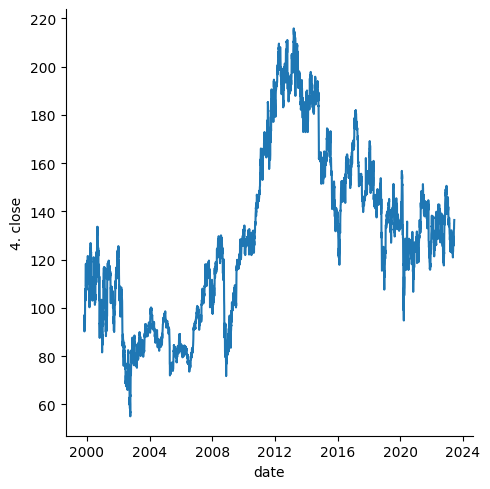

In [ ]:
sns.relplot(
    data = df,
    x='date',
    y='4. close',
    kind = 'line')

# 6. Basic Data transforms

In [ ]:
import numpy as np
# Introducing Stationarity in daily returns

# Sort the DataFrame by timestamps if it's not already sorted
df = df.sort("date")

# Calculate the natural logarithm return - note np.log() is ln WHILE np.log10 is log...
log_return = np.log(df['4. close']) - np.log(df['4. close'].shift(1))

# Add the logarithmic return as a new column
df = df.with_columns(log_return = log_return)
df

/usr/local/lib/python3.10/dist-packages/polars/series/series.py:1025: RuntimeWarning: divide by zero encountered in log
  series = f(lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs))


date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,log_return
date,f64,f64,f64,f64,f64,i64,f64,f64,f64
1999-11-01,98.5,98.81,96.37,96.75,51.949021,9551800,0.0,1.0,null
1999-11-02,96.75,96.81,93.69,94.81,50.907356,11105400,0.0,1.0,-0.020255
1999-11-03,95.87,95.94,93.5,94.37,50.671102,10369100,0.0,1.0,-0.004652
1999-11-04,94.44,94.44,90.0,91.56,49.162298,16697600,0.0,1.0,-0.030229
1999-11-05,92.75,92.94,90.19,90.25,48.458906,13737600,0.0,1.0,-0.014411
1999-11-08,90.5,93.94,90.5,93.94,50.50465,8522300,0.12,1.0,0.040073
1999-11-09,95.06,95.5,92.12,93.62,50.332609,9551200,0.0,1.0,-0.003412
1999-11-10,94.62,97.06,94.12,97.0,52.149788,8680300,0.0,1.0,0.035467
1999-11-11,97.5,97.5,94.87,95.0,51.074534,7147500,0.0,1.0,-0.020834


In [ ]:
#Summary stats.

df['log_return'].describe() # <-- fairly shit summary statistics - need to look for other package

# Love it that the share lost 16 pct in one day!

statistic,value
str,f64
"""count""",5941.0
"""null_count""",1.0
"""mean""",0.000058
"""std""",0.016601
"""min""",-0.16889
"""max""",0.113488
"""median""",0.000236
"""25%""",-0.007316
"""75%""",0.007609


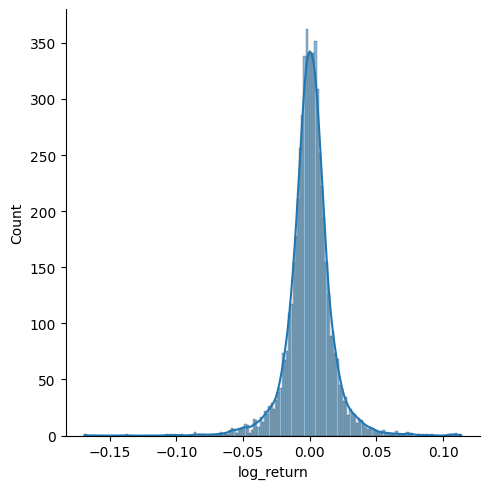

In [ ]:
# Ability to add Kernel density estimate (not sure why we need it but hey... => FAT TAILS)
sns.displot(data = df, x="log_return", kde=True)